In [88]:
import pandas as pd
df=pd.read_csv('/content/framingham.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [89]:
df['TenYearCHD'].value_counts() #here zeros are more 

0    3596
1     644
Name: TenYearCHD, dtype: int64

In [90]:
#imbalanced
#1.oversampling-increase number of minority samples to equal
#2.undersampling-decrease the number of majority samples

In [91]:
x=df['cigsPerDay'].mode()[0]
x

0.0

In [92]:
df['cigsPerDay']=df['cigsPerDay'].fillna(df['cigsPerDay'].mode()[0])

In [93]:
df['BPMeds']=df['BPMeds'].fillna(df['BPMeds'].mode()[0])
df['BMI']=df['BMI'].fillna(df['BMI'].mean())
df['totChol']=df['totChol'].fillna(df['totChol'].mean())
df['heartRate']=df['heartRate'].fillna(df['heartRate'].mean())
df['glucose']=df['glucose'].fillna(df['glucose'].mean())

In [94]:
df.drop(['education'],axis=1,inplace=True)

In [95]:
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [96]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [97]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
Xo,yo=oversample.fit_resample(X,y)

In [98]:
yo.value_counts()

0    3596
1    3596
Name: TenYearCHD, dtype: int64

In [99]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Xo,yo,test_size=0.3,random_state=1)
print(X_train.shape)
print(X_test.shape)

(5034, 14)
(2158, 14)


In [100]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_new=sc.transform(X_train)
X_test_new=sc.transform(X_test)

In [101]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_new,y_train)
y_pred=knn.predict(X_test_new)
y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [102]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.66      0.74      1074
           1       0.72      0.87      0.79      1084

    accuracy                           0.77      2158
   macro avg       0.78      0.77      0.76      2158
weighted avg       0.78      0.77      0.76      2158



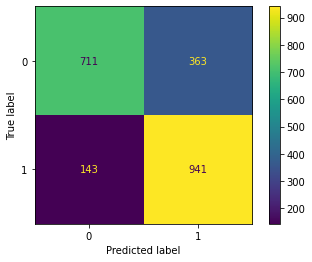

In [103]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [104]:
#undersamplings
from imblearn.under_sampling import RandomUnderSampler
under=RandomUnderSampler()
Xu,yu=under.fit_resample(X,y)

In [105]:
yu.value_counts()

0    644
1    644
Name: TenYearCHD, dtype: int64

In [106]:
Xu

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,0,49,0,0.0,0.0,0,0,0,224.0,130.0,87.0,29.01,75.0,73.0
1,0,56,1,1.0,1.0,0,1,0,289.0,150.0,92.0,25.68,85.0,84.0
2,1,63,1,15.0,0.0,0,1,0,207.0,165.0,100.0,21.33,72.0,77.0
3,0,46,0,0.0,0.0,0,1,0,238.0,162.0,87.5,26.95,100.0,93.0
4,0,61,0,0.0,0.0,0,0,0,271.0,122.0,67.5,22.02,73.0,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,1,50,0,0.0,0.0,0,0,0,260.0,119.0,74.0,21.85,80.0,72.0
1284,1,56,0,0.0,1.0,0,1,0,287.0,149.0,98.0,21.68,90.0,75.0
1285,1,58,0,0.0,0.0,0,0,0,233.0,125.5,84.0,26.05,67.0,76.0
1286,1,68,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0


In [107]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Xu,yu,test_size=0.3,random_state=1)
print(X_train.shape)
print(X_test.shape)

(901, 14)
(387, 14)


In [108]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_new=sc.transform(X_train)
X_test_new=sc.transform(X_test)

In [109]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_new,y_train)
y_pred=knn.predict(X_test_new)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,

              precision    recall  f1-score   support

           0       0.61      0.65      0.63       196
           1       0.62      0.57      0.59       191

    accuracy                           0.61       387
   macro avg       0.61      0.61      0.61       387
weighted avg       0.61      0.61      0.61       387



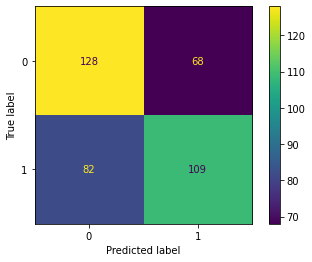

In [111]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [ ]:
#feature selection
#+ve correlation
#demand price 
#-ve correlation
#supply demand